### Columns

#### People  
**ID**: Customer's unique identifier.   
**Year_Birth**: Customer's birth year.  
**Education**: Customer's education level.  
**Marital_Status**: Customer's marital status.  
**Income**: Customer's yearly household income.  
**Kidhome**: Number of children in customer's household.  
**Teenhome**: Number of teenagers in customer's household.  
**Dt_Customer**: Date of customer's enrollment with the company.  
**Recency**: Number of days since customer's last purchase.  
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise.  
#### Products   
**MntWines**: Amount spent on wine in last 2 years.  
**MntFruits**: Amount spent on fruits in last 2 years.  
**MntMeatProducts**: Amount spent on meat in last 2 years.  
**MntFishProducts**: Amount spent on fish in last 2 years.  
**MntSweetProducts**: Amount spent on sweets in last 2 years.  
**MntGoldProds**: Amount spent on gold in last 2 years.  

#### Promotion  
**NumDealsPurchases**: Number of purchases made with a discount.  
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.  
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.  
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.  
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.  
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.  
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise.  

#### Place  
**NumWebPurchases**: Number of purchases made through the company’s website.  
**NumCatalogPurchases**: Number of purchases made using a catalogue.  
**NumStorePurchases**: Number of purchases made directly in stores.  
**NumWebVisitsMonth**: Number of visits to company’s website in the last month.  

Load the [dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data). 

In [1]:
import pandas as pd
import numpy as np

# cell 2: load TSV (tab-separated) and show head
csv_path = 'marketing_campaign.csv'

# Read as tab-separated (\t).
df = pd.read_csv(csv_path, sep='\t', encoding='utf-8', low_memory=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
# cell 4: fill missing Income by group mean (Education + Marital Status), round stored values, and show the rows that were missing
from IPython.display import display
# find income column
income_cols = [c for c in df.columns if 'income' in c.lower()]
if not income_cols:
    raise KeyError("No column with name containing 'income' found in df.columns")
income_col = income_cols[0]
# remember which rows were missing originally
was_missing = df[income_col].isna()
missing_before = was_missing.sum()
print(f'Filling {missing_before} missing Income values (if any)')
# coerce to numeric
df[income_col] = pd.to_numeric(df[income_col], errors='coerce')
# find grouping columns (case-insensitive)
edu = next((c for c in df.columns if 'education' in c.lower()), None)
marital = next((c for c in df.columns if 'marital' in c.lower()), None)
if edu and marital:
    group_cols = [edu, marital]
    grp_mean = df.groupby(group_cols)[income_col].transform('mean')
    df[income_col] = df[income_col].fillna(grp_mean)
# fallback to overall mean for any remaining missing values
overall_mean = df[income_col].mean()
df[income_col] = df[income_col].fillna(overall_mean)
# round values in-place to nearest cent (this updates the DataFrame cells)
df[income_col] = df[income_col].round(2)
# show the rows that were originally missing, with all columns and rounded income
filled_rows = df.loc[was_missing].copy()
print(f'Rows originally missing: {len(filled_rows)}')
display(filled_rows)
# end of cell — only output is the list of filled rows as requested

Filling 24 missing Income values (if any)
Rows originally missing: 24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,50800.26,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,51322.18,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,53314.61,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,51322.18,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,51322.18,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,46201.10,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,58138.03,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,51322.18,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,52109.01,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,58138.03,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [4]:
# cell 7: change Dt_Customer to a date datatype with format D-M-Y
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [5]:
# cell 5: show descriptive statistics for each column
for col in df.columns:
    if df[col].dtype == 'object':
        # for categorical columns
        print(f"\nStatistics for {col}:")
        print(df[col].value_counts())
    elif df[col].dtype == 'datetime64[ns]':
        # for date columns
        print(f"\nStatistics for {col}:")
        print(f"Earliest date: {df[col].min()}")
        print(f"Latest date: {df[col].max()}")
    else:
        # for numeric columns
        print(f"\nStatistics for {col}:")
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")


Statistics for ID:
Min: 0
Max: 11191

Statistics for Year_Birth:
Min: 1893
Max: 1996

Statistics for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Statistics for Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Statistics for Income:
Min: 1730.0
Max: 666666.0

Statistics for Kidhome:
Min: 0
Max: 2

Statistics for Teenhome:
Min: 0
Max: 2

Statistics for Dt_Customer:
Earliest date: 2012-07-30 00:00:00
Latest date: 2014-06-29 00:00:00

Statistics for Recency:
Min: 0
Max: 99

Statistics for MntWines:
Min: 0
Max: 1493

Statistics for MntFruits:
Min: 0
Max: 199

Statistics for MntMeatProducts:
Min: 0
Max: 1725

Statistics for MntFishProducts:
Min: 0
Max: 259

Statistics for MntSweetProducts:
Min: 0
Max: 263

Statistics for MntGoldProds:
Min: 0
Max: 362

Statist

In [6]:
# cell 6: change 'Alone', 'Absurd', and 'YOLO' values of Marital_Status to 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

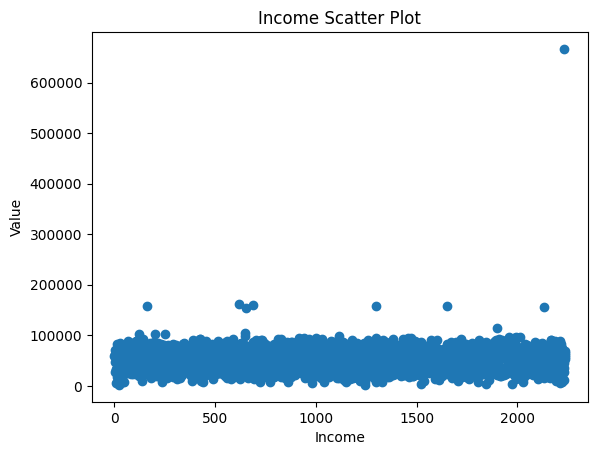

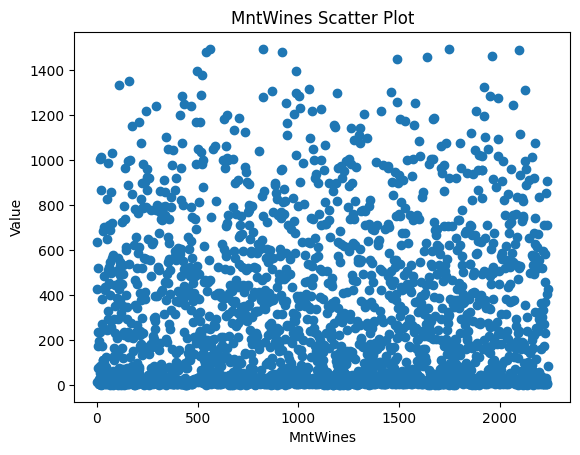

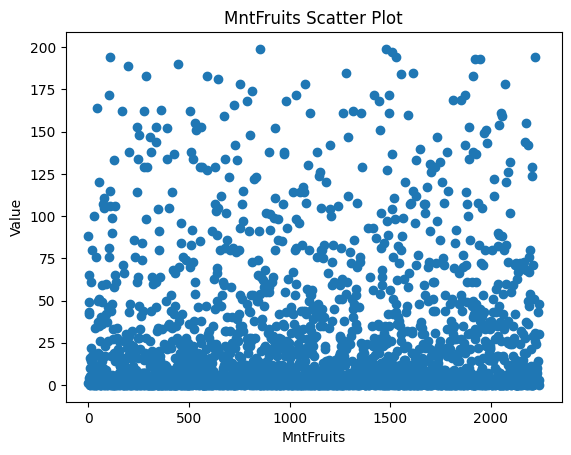

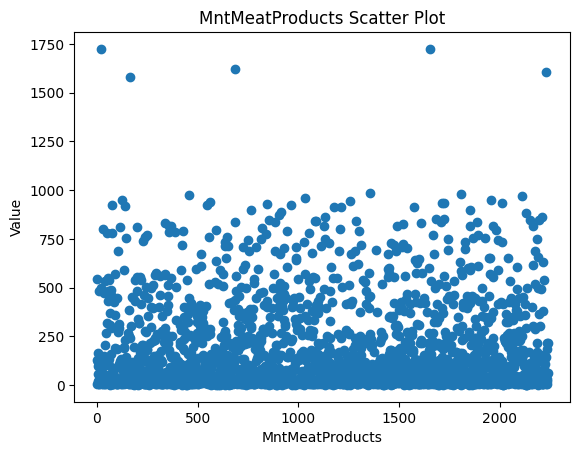

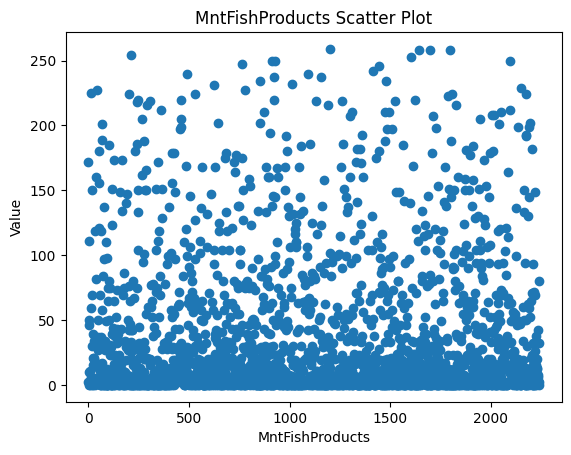

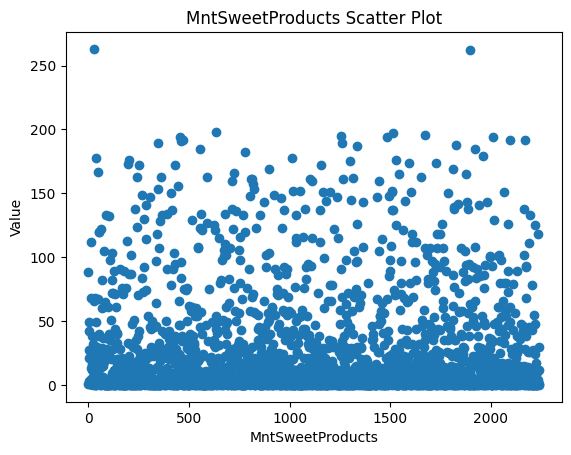

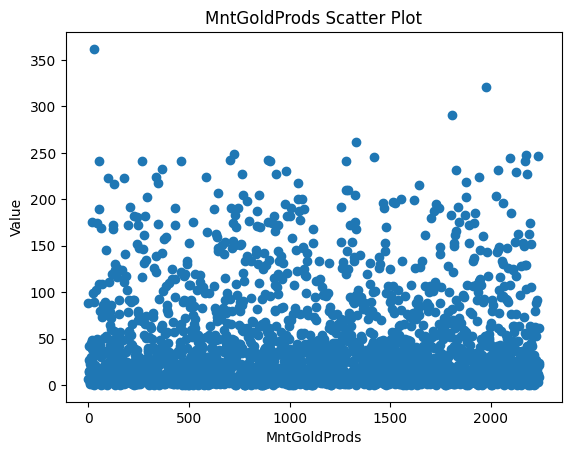

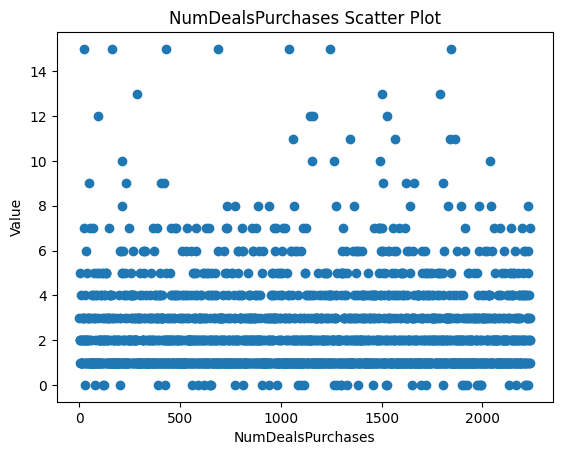

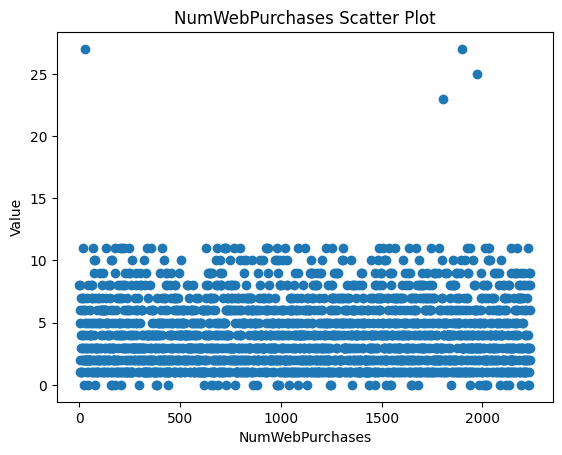

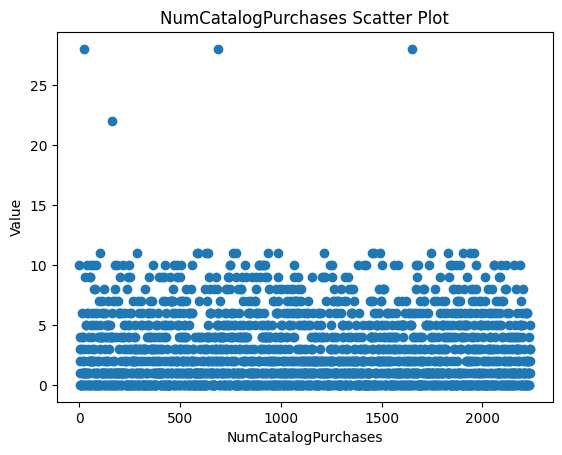

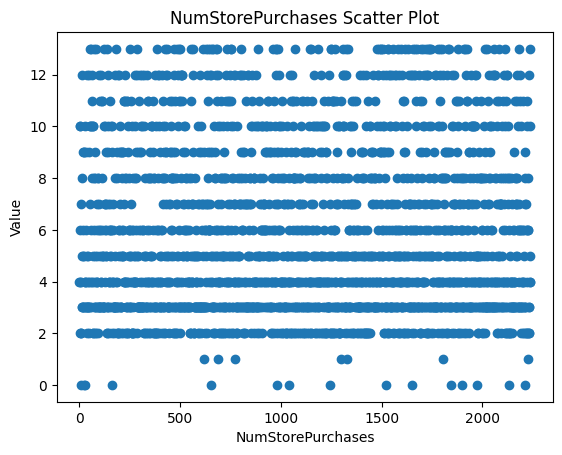

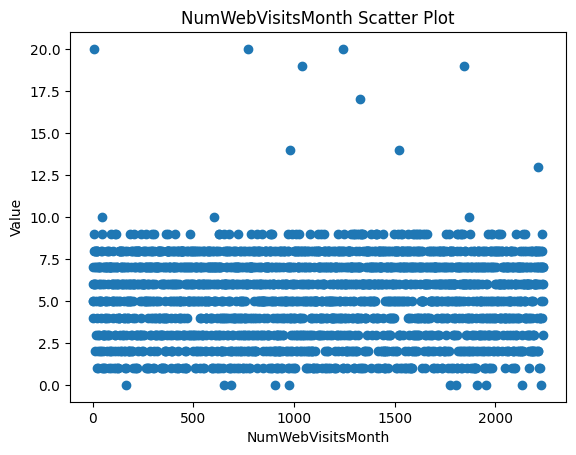

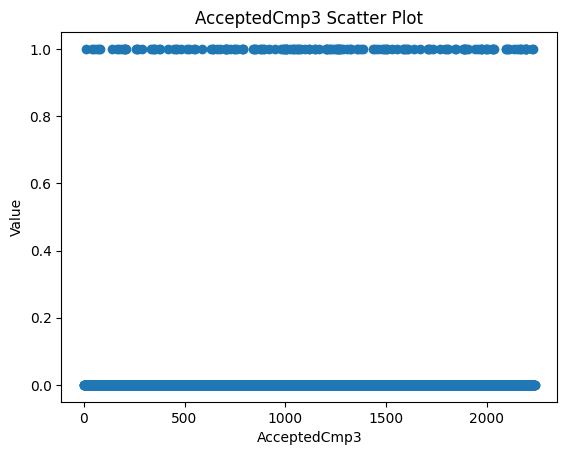

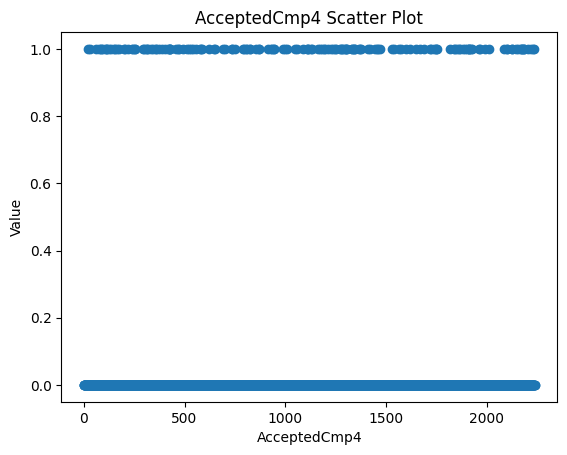

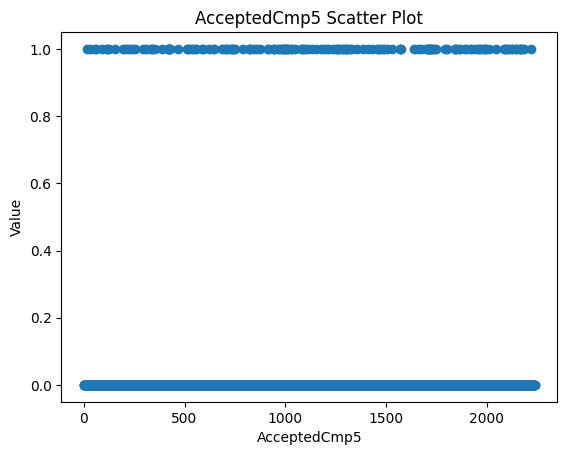

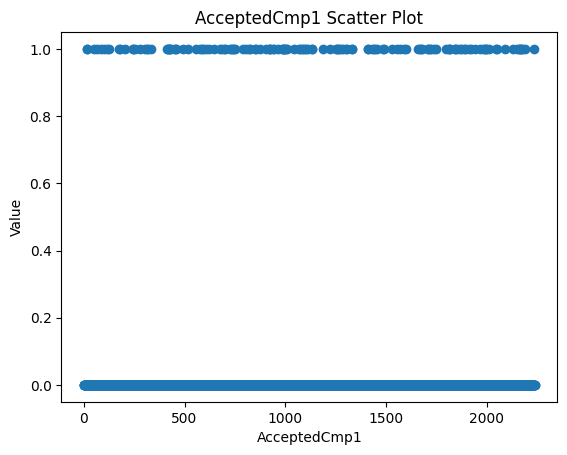

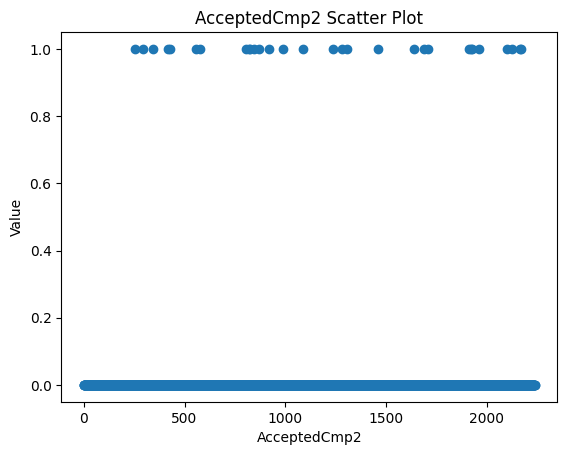

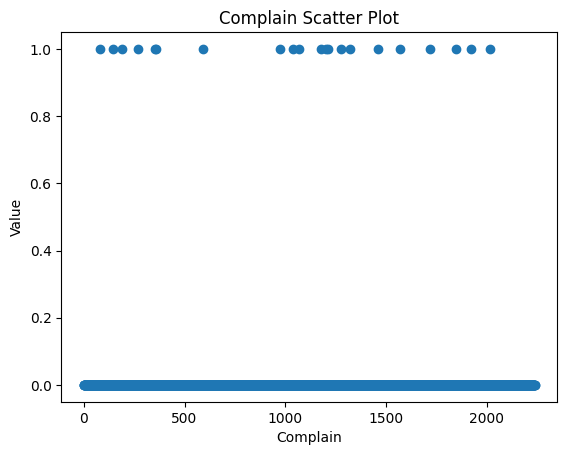

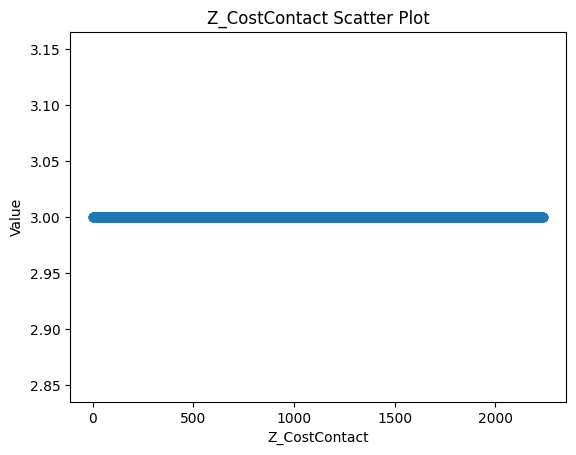

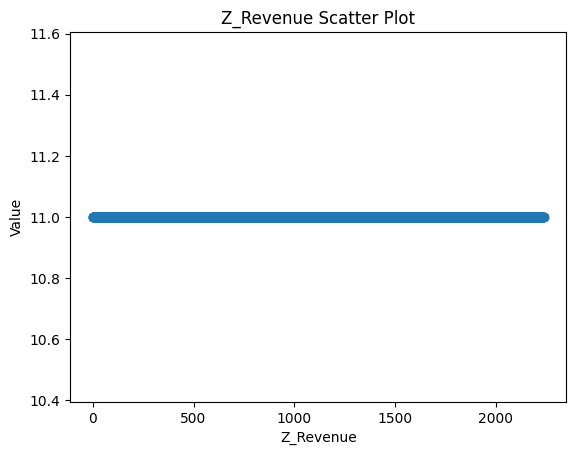

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features for plotting
variables = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']]

# Loop through each variable
for var in variables:
    # Check the data type
    if variables[var].dtype == 'float64' or variables[var].dtype == 'int64':
        # Plot a scatter plot if the variable is numerical
        plt.scatter(df.index, variables[var])
        plt.xlabel(var)
        plt.ylabel('Value')
        plt.title(f'{var} Scatter Plot')
        plt.show()
    elif variables[var].dtype == 'object':
        # Plot a bar plot if the variable is categorical
        sns.countplot(x=df[var], data=df)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'{var} Bar Plot')
        plt.show()

In [8]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [9]:
df = df[df['Income'] <= 600000]

Base Model

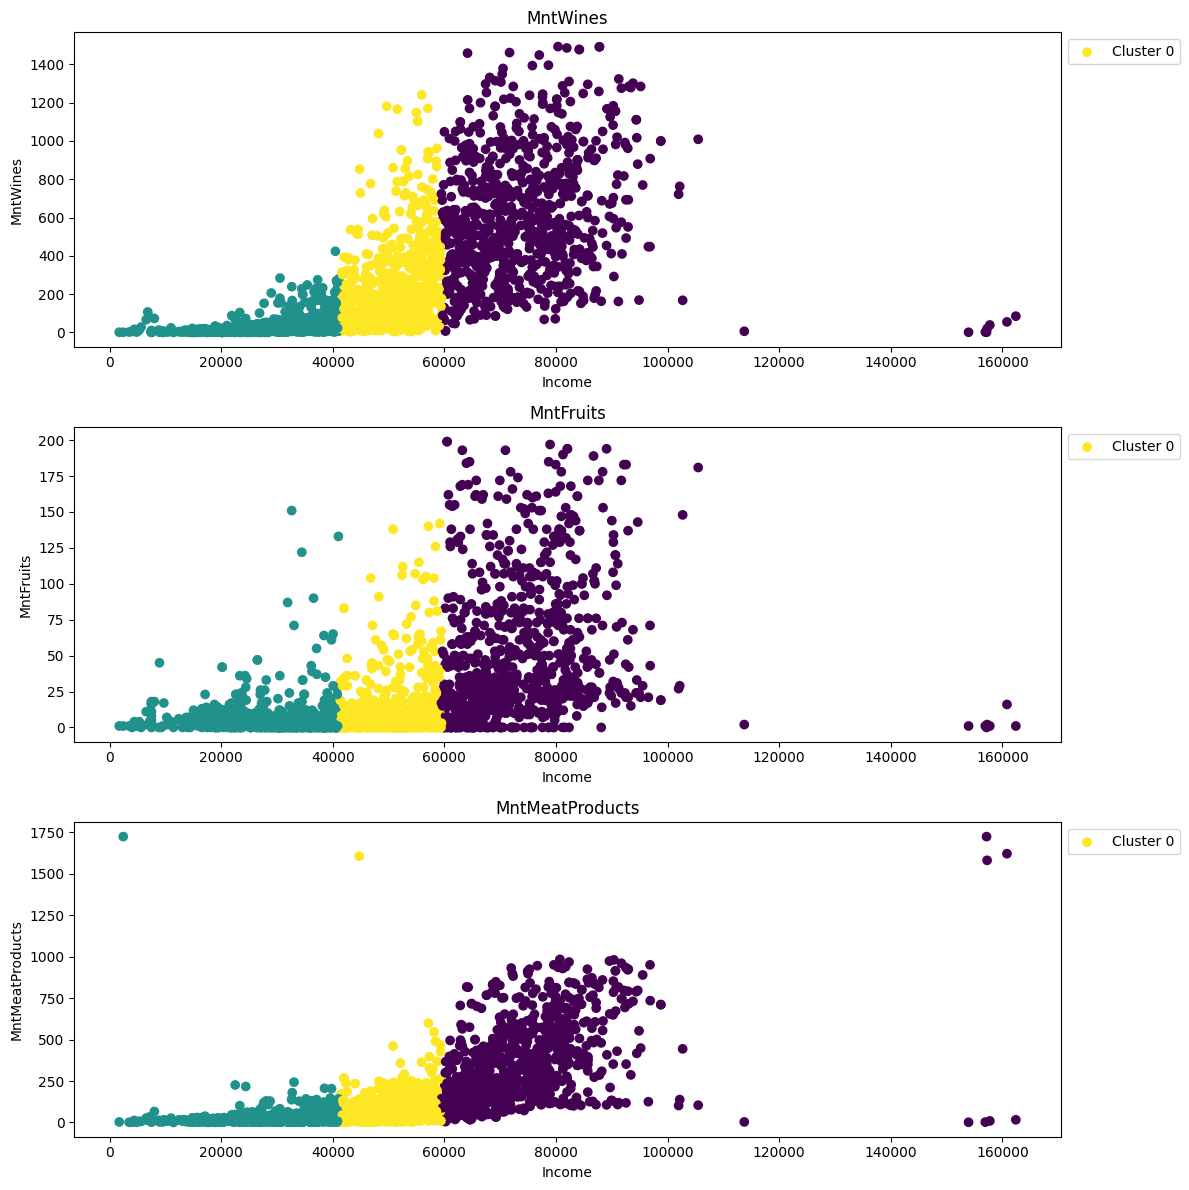

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = model.fit_predict(df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts']])

# Assign cluster assignments back to the DataFrame
df = df.assign(cluster=clusters)

# Define the colors for each cluster
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create subplots for cluster visualization
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

# Plot scatter plots for each cluster
for i, variable in enumerate(['MntWines', 'MntFruits', 'MntMeatProducts']):
    cluster_data = df[['Income', variable]]
    axes[i].scatter(cluster_data['Income'], cluster_data[variable], c=df['cluster'])
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(variable)
    axes[i].set_title(variable)
    axes[i].legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='upper left', bbox_to_anchor=(1, 1))
    
# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

Encode Categorical Features

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical values using LabelEncoder
le = LabelEncoder()
df_encoded = df.copy()

# Apply LabelEncoder to each categorical variable
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Convert numeric variables to numerical values if needed
df_encoded = df_encoded.astype({'Income': 'float64', 'Kidhome': 'int64', 'Teenhome': 'int64', 'Recency': 'int64', 'NumDealsPurchases': 'int64', 'NumWebPurchases': 'int64', 'NumCatalogPurchases': 'int64', 'NumStorePurchases': 'int64', 'NumWebVisitsMonth': 'int64', 'AcceptedCmp3': 'int64', 'AcceptedCmp4': 'int64', 'AcceptedCmp5': 'int64', 'AcceptedCmp1': 'int64', 'AcceptedCmp2': 'int64', 'Complain': 'int64', 'Response': 'int64'})

# Check the data types of the converted DataFrame
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   int64         
 3   Marital_Status       2239 non-null   int64         
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   int64         
 6   Teenhome             2239 non-null   int64         
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-null   i

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   int64         
 3   Marital_Status       2239 non-null   int64         
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   int64         
 6   Teenhome             2239 non-null   int64         
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-null   i

Feature Selection with Silhouette Score

In [13]:
# Drop the 'Dt_Customer' and 'Income' columns from df_encoded
df_encoded = df_encoded.drop(['Dt_Customer', 'Income'], axis=1)

In [14]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import silhouette_score

# Perform hierarchical clustering with all features
model_all = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters_all = model_all.fit_predict(df_encoded)

# Define the range of features to evaluate
num_features_range = range(1, len(df_encoded.columns))

# Evaluate the performance of different feature combinations
scores = []
useful_features = []
for num_features in num_features_range:
    # Select the top features
    selector = SelectKBest(k=num_features)
    X_selected = selector.fit_transform(df_encoded, y=df_encoded['cluster'])
    selected_features = df_encoded.columns[selector.get_support(indices=True)]
    
    # Evaluate the performance using a suitable metric (e.g., silhouette score)
    score = silhouette_score(df_encoded, clusters_all)
    scores.append((num_features, score))
    useful_features.append((num_features, selected_features))
    
# Find the best number of features
best_num_features, best_score = max(scores, key=lambda x: x[1])
print(f"Best number of features: {best_num_features}")
print(f"Best score: {best_score}")

# Get the features and their usefulness for the model
useful_features_df = pd.DataFrame(useful_features, columns=['Num_Features', 'Features'])
useful_features_df['Score'] = scores
print(useful_features_df)

/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: Runtime

Best number of features: 1
Best score: 0.47928609445162795
    Num_Features                                           Features  \
0              1                 Index(['cluster'], dtype='object')   
1              2     Index(['MntWines', 'cluster'], dtype='object')   
2              3  Index(['MntWines', 'NumStorePurchases', 'clust...   
3              4  Index(['MntWines', 'NumCatalogPurchases', 'Num...   
4              5  Index(['MntWines', 'MntMeatProducts', 'NumCata...   
5              6  Index(['MntWines', 'MntMeatProducts', 'NumCata...   
6              7  Index(['Kidhome', 'MntWines', 'MntMeatProducts...   
7              8  Index(['Kidhome', 'MntWines', 'MntMeatProducts...   
8              9  Index(['Kidhome', 'MntWines', 'MntFruits', 'Mn...   
9             10  Index(['Kidhome', 'MntWines', 'MntFruits', 'Mn...   
10            11  Index(['Kidhome', 'MntWines', 'MntFruits', 'Mn...   
11            12  Index(['Kidhome', 'MntWines', 'MntFruits', 'Mn...   
12            13  

/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/johnpospisil/tf/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2239 non-null   int64
 1   Year_Birth           2239 non-null   int64
 2   Education            2239 non-null   int64
 3   Marital_Status       2239 non-null   int64
 4   Kidhome              2239 non-null   int64
 5   Teenhome             2239 non-null   int64
 6   Recency              2239 non-null   int64
 7   MntWines             2239 non-null   int64
 8   MntFruits            2239 non-null   int64
 9   MntMeatProducts      2239 non-null   int64
 10  MntFishProducts      2239 non-null   int64
 11  MntSweetProducts     2239 non-null   int64
 12  MntGoldProds         2239 non-null   int64
 13  NumDealsPurchases    2239 non-null   int64
 14  NumWebPurchases      2239 non-null   int64
 15  NumCatalogPurchases  2239 non-null   int64
 16  NumStorePurchases    2239 non

In [16]:
df_encoded.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cluster
0,5524,1957,2,2,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,2
1,2174,1954,2,2,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,2,3,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,2,3,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,1
4,5324,1981,4,1,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,2


Improved Model

In [17]:
df_encoded.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'cluster'],
      dtype='object')

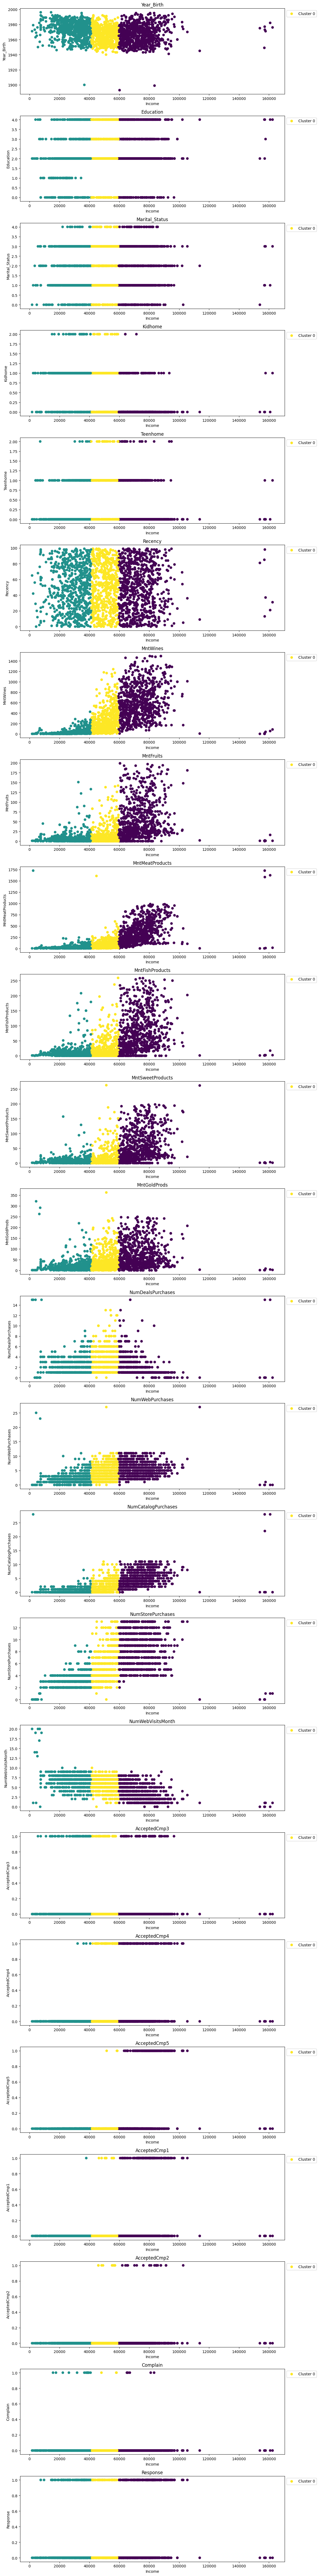

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Copy the "Income" column from df to df_encoded
df_encoded['Income'] = df['Income']

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = model.fit_predict(df_encoded[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts']])

# Assign cluster assignments back to the DataFrame
df_encoded = df_encoded.assign(cluster=clusters)

# Define the colors for each cluster
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}

# Get the list of variables
variables = ['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

# Create subplots for cluster visualization
num_plots = len(variables)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(12, 4*num_plots))

# Plot scatter plots for each cluster
for i, variable in enumerate(variables):
    cluster_data = df_encoded[['Income', variable]]
    axes[i].scatter(cluster_data['Income'], cluster_data[variable], c=df_encoded['cluster'])
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(variable)
    axes[i].set_title(variable)
    axes[i].legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='upper left', bbox_to_anchor=(1, 1))
    
# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()